In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('birthrates.csv')

In [3]:
# Look at the first 3 rows
df[:3]

,Country,year,month,value
0,Aland Islands,2015,January,20.0
1,Aland Islands,2015,February,24.0
2,Aland Islands,2015,March,20.0


In [4]:
# an example of masking in action
mask = df['Country'] == 'Germany'
mask2 = df[mask]['month'] == 'January'
df[mask][mask2]['value'].values.mean()

57642.0

In [5]:
countries = df['Country'].unique()
months = df['month'].unique()
averaged_months = []
for country in countries:
    current_country = df['Country'] == country
    for month in months:
        current_month = df[current_country]['month'] == month
        average = df[current_country][current_month]['value'].mean()
        averaged_months.append([country, month, average])

In [6]:
months_dataframe = pd.DataFrame(averaged_months, columns=["country", "month", "value"])

In [7]:
months_dataframe[:3]

,country,month,value
0,Aland Islands,January,19.666667
1,Aland Islands,February,22.333333
2,Aland Islands,March,23.333333


In [8]:
countries = months_dataframe['country'].unique()
countries

array(['Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Anguilla',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Bermuda', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Cayman Islands', 'Chile',
       'Hong Kong SAR', 'Macao SAR', 'Costa Rica', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia', 'Denmark', 'Egypt', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Greenland', 'Guam', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Montserrat', 'Netherlands', 'New Zealand', 'Norway',
       'Panama', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Rus

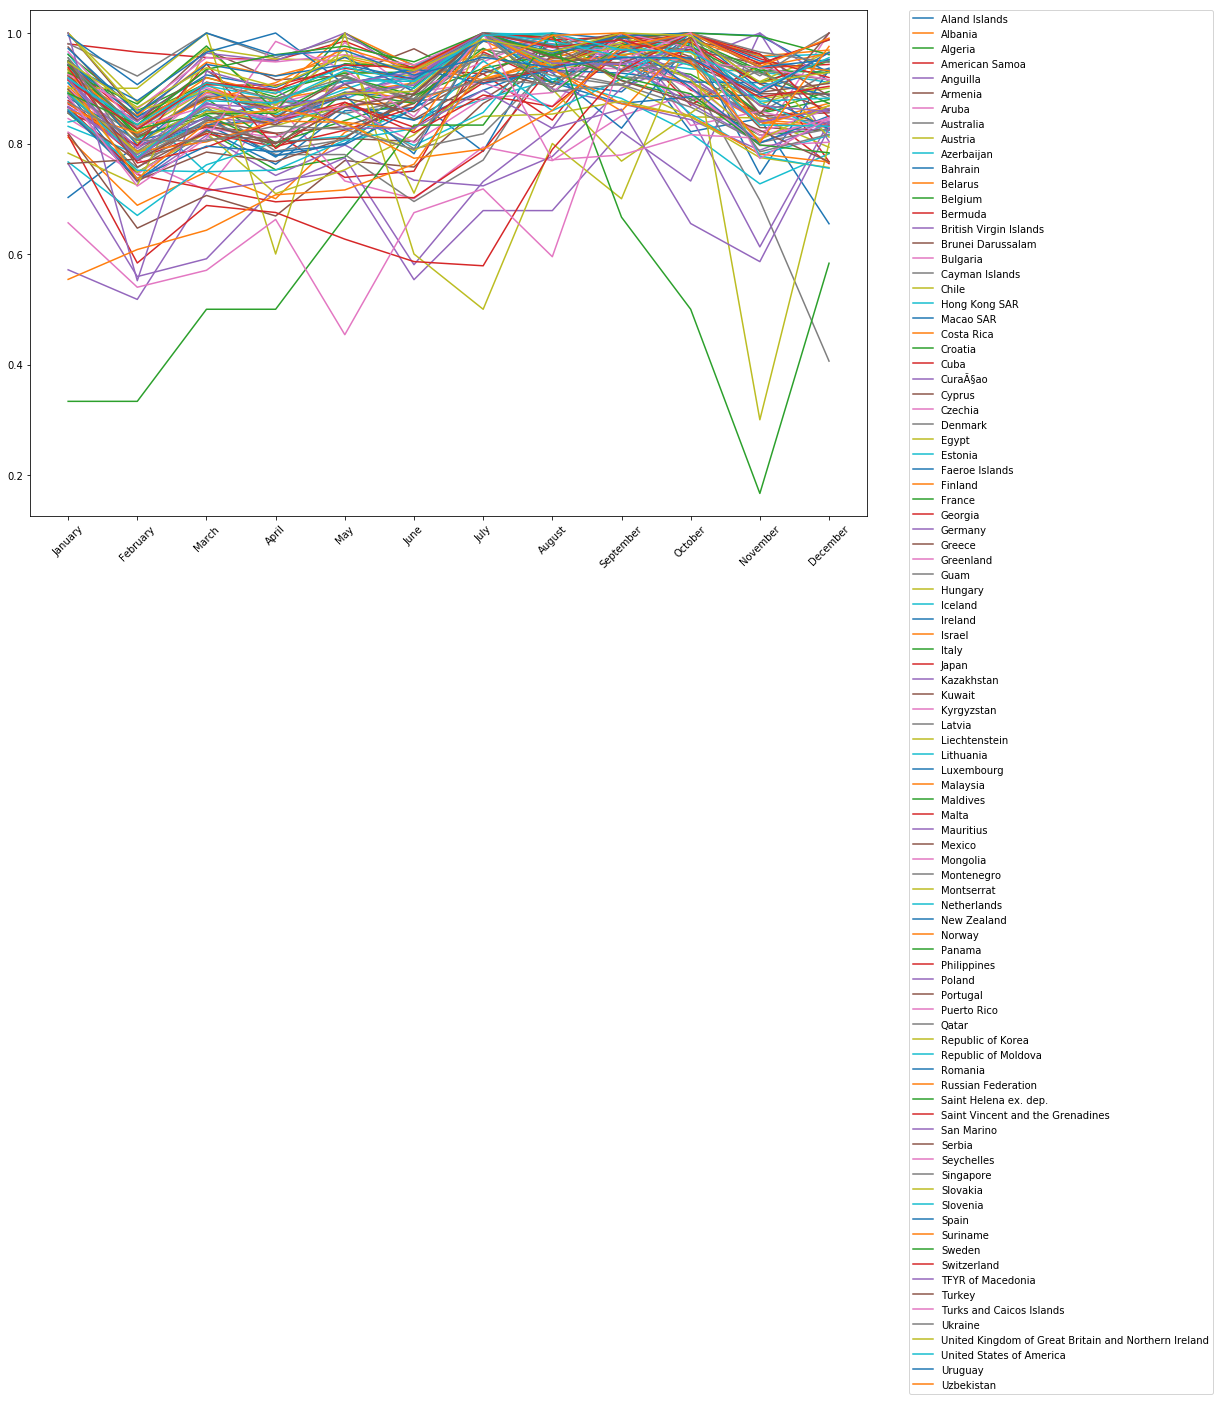

In [9]:
f, ax = plt.subplots(1, figsize=(15, 15/1.61))
time2 = [x for x in range(1, 13)]
maxima = []
maxima2 = []
time = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for country in countries:
    mask = months_dataframe['country'] == country
    values = months_dataframe[mask].values[:, 2]
    values = values / values.max()
    ax.plot(time2, values, label=months_dataframe[mask].values[0, 0])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(time2, time, rotation='45')
    months_dataframe[mask].values[:, 2]
    max_arg = np.argmax(months_dataframe[mask].values[:, 2])
    second_max = np.argsort(months_dataframe[mask].values[:, 2])[1]
    max_month = months_dataframe[mask].values[:, 1][max_arg]
    maxima.append(max_arg)
    maxima2.append(second_max)

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

(array([  2.,  19.,   5.,  24.,   0.,  12.,   3.,   2.,   0.,   1.,  17.,
          7.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.]),
 <a list of 12 Patch objects>)

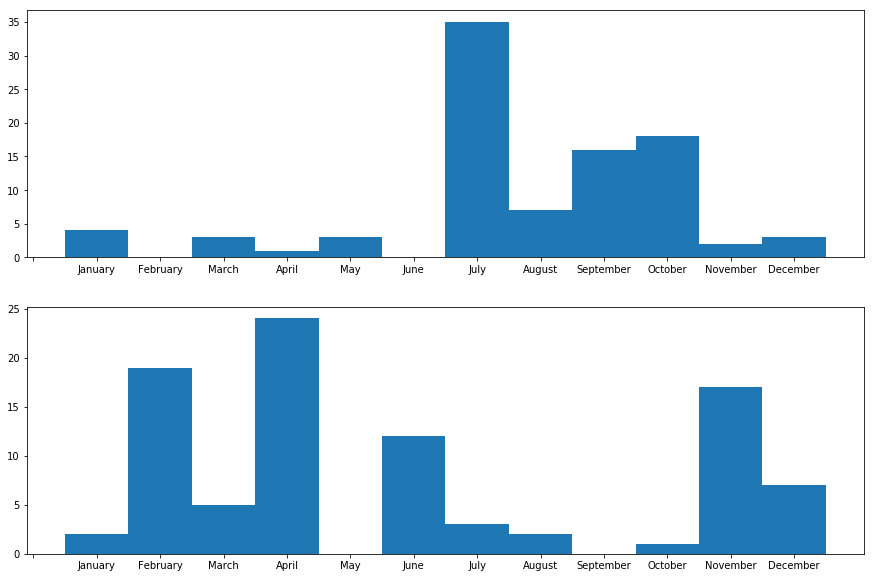

In [10]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0].hist(maxima, bins=12, align='right', range=[0, 12])
ax[0].xaxis.set_ticks(range(13))
ax[0].set_xticklabels([''] + time)

ax[1].xaxis.set_ticks(range(13))
ax[1].set_xticklabels([''] + time)
ax[1].hist(maxima2, bins=12, range=[0, 12], align='right', width=1)

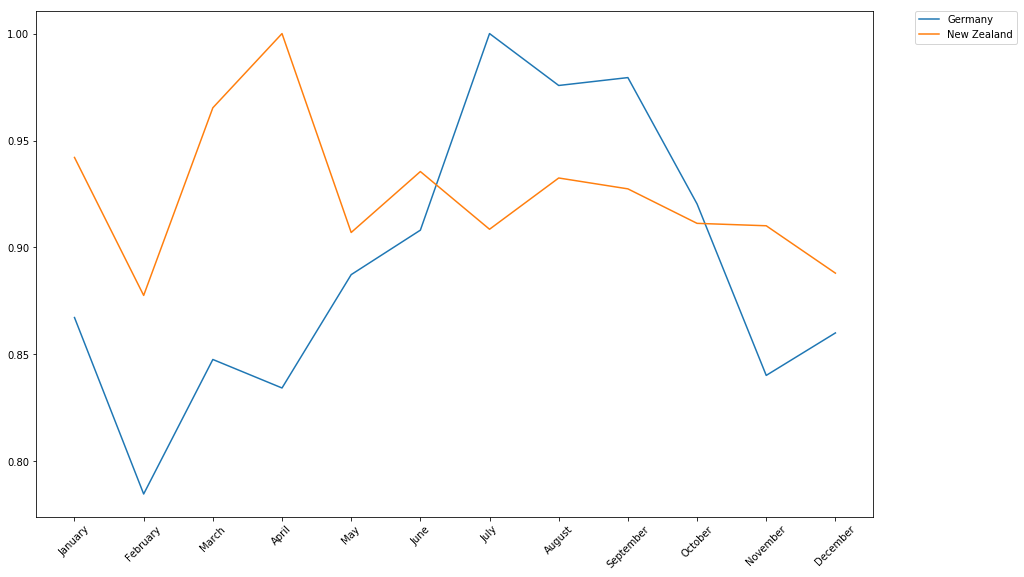

In [11]:
f, ax = plt.subplots(1, figsize=(15, 15/1.61))
time2 = [x for x in range(1, 13)]

countries = ['Aruba', 'Bermuda', 'Cuba', "Chile", "Saint Vincent and the Grenadines","Turks and Caicos Islands","Anguilla","British Virgin Islands","Cayman Islands", 'CuraÃ§ao',"Puerto Rico"]
countries = ['Germany', 'New Zealand']
for country in countries:
    mask = months_dataframe['country'] == country
    values = months_dataframe[mask].values[:, 2]
    values = values / values.max()
    ax.plot(time2, values, label=months_dataframe[mask].values[0, 0])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(time2, time, rotation='45')
    months_dataframe[mask].values[:, 2]

time = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
value = [19.666666666666668, 22.333333333333332, 23.333333333333332, 23.666666666666668, 25.0, 24.666666666666668, 22.0, 28.0, 27.666666666666668, 23.0, 23.666666666666668, 18.333333333333332]

In [12]:
mask = months_dataframe['country'] == 'Montserrat'

In [13]:
months_dataframe[mask]

,country,month,value
696,Montserrat,January,4.5
697,Montserrat,February,4.5
698,Montserrat,March,5.0
699,Montserrat,April,3.0
700,Montserrat,May,5.0
701,Montserrat,June,3.0
702,Montserrat,July,2.5
703,Montserrat,August,4.0
704,Montserrat,September,3.5
705,Montserrat,October,5.0
